In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 999)
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib
import plotly.express as px

In [2]:
df = pd.read_csv('/Users/SnehPandya/Desktop/DeepLearningAGN/data/dr14/TRAIN_dr14_err<.3.csv')
features_df = df[['M_i','z','u_band','g_band','r_band','i_band','z_band','ug','gr','ri','iz','zu']]

Text(87.0, 0.5, 'Principal Components')

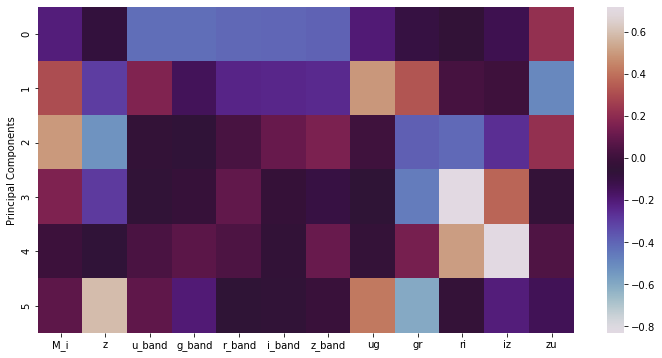

In [21]:
# features.head()
sc = StandardScaler()
pca = PCA(.95)

features = sc.fit_transform(np.asarray(df.iloc[:,[6,8,12,13,14,15,16,17,18,19,20,21]]))
pca.fit(features)
features = pca.transform(features)


# components = pca.fit_transform(features)

map= pd.DataFrame(pca.components_,columns=features_df.columns)
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')
plt.ylabel('Principal Components')
# plt.savefig('/Users/SnehPandya/Desktop/DeepLearningAGN/data/dr14/heatmap.pdf')
# plt.hist(pca.explained_variance_ratio_)

In [ ]:
components

In [ ]:
# boston = load_boston()
# df = pd.DataFrame(boston.data, columns=boston.feature_names)
n_components = 6
total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'Mass'

fig = px.scatter_matrix(
    components,
    color=df['Mass'],
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
features = train[['u_band','g_band', 'r_band', 'i_band','z_band', 'ug','gr','ri','iz','zu','z','M_i']]

In [ ]:
target = train['Mass'].values

In [ ]:
corrMatrix = features.corr()

In [ ]:
sns.heatmap(corrMatrix,annot=True)
plt.show()

In [ ]:
sc=StandardScaler()
features = sc.fit_transform(np.asarray(features))
np.std(features)

In [ ]:
feat_cols = ['feature'+str(i) for i in range(features.shape[1])]
feat_cols

In [ ]:
normalised_df = pd.DataFrame(features,columns=feat_cols)

In [ ]:
pca_bh = PCA(n_components='mle')
principalComponents_bh = pca_bh.fit_transform(features)
principalComponents_bh

In [ ]:
principal_bh_df = pd.DataFrame(data = principalComponents_bh
             , columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7'])
principal_bh_df['y'] = target

In [ ]:
principal_bh_df.head()

In [ ]:
print('Explained variation per principal component: {}'.format(pca_bh.explained_variance_ratio_))

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    data=principal_bh_df,
    legend="full",
    alpha=0.3
)

In [ ]:
#redshift--firebrick